In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/refs/heads/master/ann_logistic_extra/ecommerce_data.csv

--2025-05-09 10:45:49--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/refs/heads/master/ann_logistic_extra/ecommerce_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12381 (12K) [text/plain]
Saving to: ‘ecommerce_data.csv’

ecommerce_data.csv  100%[===================>]  12.09K  --.-KB/s    in 0s      

2025-05-09 10:45:49 (76.6 MB/s) - ‘ecommerce_data.csv’ saved [12381/12381]



In [ ]:
df = pd.read_csv('ecommerce_data.csv')
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


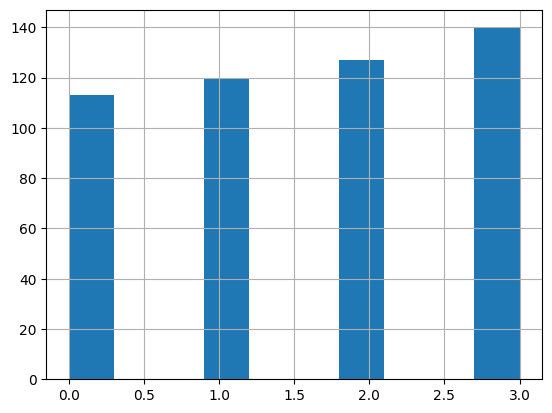

In [ ]:
df['time_of_day'].hist();

In [ ]:
def get_data():
    df = pd.read_csv('ecommerce_data.csv')
    # df.head()
    # easier to work with numpy array
    data = df.to_numpy()

    # shuffle our data, by the row. The columns don't get mixed
    np.random.shuffle(data)

    # split features and labels
    X = data[:, :-1]
    Y = data[:, -1].astype(np.int32)

    # one-hot encoding for time of day
    N, D = X.shape
    X2 = np.zeros((N, D+3))  # add only three because we can replace one column
    X2[:, :(D-1)] = X[:, :(D-1)]

    for n in range(N):
        t = int(X[n, D-1])  # t is the value in that cell
        X2[n, t+D-1] = 1    # puts a value of 1 in the t-th column of that row
                            # adds 1 in col. 7 for a value 3, adds 1 in col. 6

    # method 2 (more efficient)
    # Z = np.zeros((N, 4))
    # Z[np.arange(N), X[:, D-1].astype(np.int32)] = 1
    # Z[(r1, r2, r3, ...), (c1, c2, c3, ...)] = value
    # X2[:, -4:] = Z

    # assign X2 back to X
    X = X2

    # split train and test
    Xtrain = X[:-100]
    Ytrain = Y[:-100]
    Xtest = X[-100:]
    Ytest = Y[-100:]

    # normalize columns 1 and 2
    for i in (1, 2):
        m = Xtrain[:, i].mean()
        s = Xtrain[:, i].std()
        Xtrain[:, i] = (Xtrain[:, i] - m) / s
        Xtest[:, i] = (Xtest[:, i] - m) / s

    return Xtrain, Ytrain, Xtest, Ytest

In [ ]:
Xtrain, Ytrain, Xtest, Ytest = get_data()

In [ ]:
Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape

((400, 8), (400,), (100, 8), (100,))

In [ ]:
def get_binary_data():
    Xtrain, Ytrain, Xtest, Ytest = get_data()
    X2train = Xtrain[Ytrain<=1]
    Y2train = Ytrain[Ytrain<=1]
    X2test = Xtest[Ytest<=1]
    Y2test = Ytest[Ytest<=1]
    return X2train, Y2train, X2test, Y2test

In [ ]:
X2train, Y2train, X2test, Y2test = get_binary_data()
X2train.shape, Y2train.shape, X2test.shape, Y2test.shape


((320, 8), (320,), (78, 8), (78,))